# Share Bike Analysis


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# ignore the version warning
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
# load the data
data_path = "./Source/Bike-Sharing-Dataset/day.csv"
raw_df = pd.read_csv(data_path, encoding="utf-8")
raw_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
raw_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
columns_to_keep = ['dteday', 'season', 'mnth', 'holiday', 'weekday',
                   'workingday', 'temp', 'atemp', 'windspeed',
                   'casual', 'registered', 'cnt']
bike_df = raw_df[columns_to_keep]
bike_df

,dteday,season,mnth,holiday,weekday,workingday,temp,atemp,windspeed,casual,registered,cnt
0,2011-01-01,1,1,0,6,0,0.344167,0.363625,0.160446,331,654,985
1,2011-01-02,1,1,0,0,0,0.363478,0.353739,0.248539,131,670,801
2,2011-01-03,1,1,0,1,1,0.196364,0.189405,0.248309,120,1229,1349
3,2011-01-04,1,1,0,2,1,0.200000,0.212122,0.160296,108,1454,1562
4,2011-01-05,1,1,0,3,1,0.226957,0.229270,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,12,0,4,1,0.254167,0.226642,0.350133,247,1867,2114
727,2012-12-28,1,12,0,5,1,0.253333,0.255046,0.155471,644,2451,3095
728,2012-12-29,1,12,0,6,0,0.253333,0.242400,0.124383,159,1182,1341
729,2012-12-30,1,12,0,0,0,0.255833,0.231700,0.350754,364,1432,1796


In [5]:
#  configure the sns parameter
sns.set_style("whitegrid")
# sns.set_context("notebook", rc={"figure.figsize":(10, 10)})

## Correlation Analysis

Text(0.05, 0.95, 'Pearson r: 0.63')

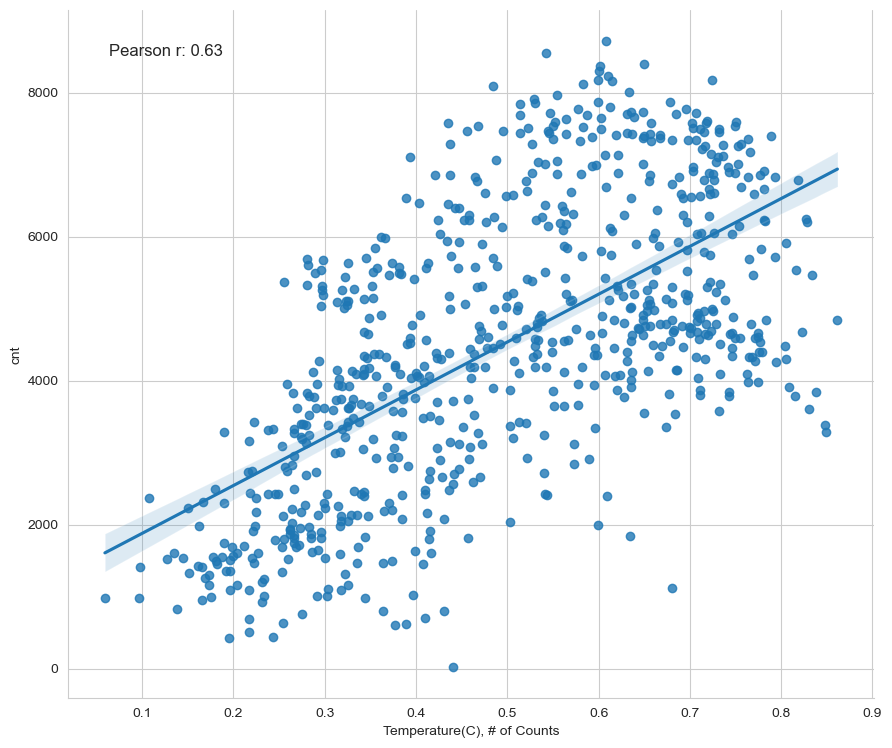

In [6]:
# import scipy
from scipy.stats import pearsonr

corr, _ = pearsonr(bike_df['temp'],bike_df['cnt'])

# lmpot
fig1 = sns.lmplot(data=bike_df, x='temp', y='cnt')
fig1.fig.set_size_inches(10, 8)  # Config the figsize
fig1.set_axis_labels("Temperature(C), # of Counts")

# Add Annotation
plt.annotate(f'Pearson r: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

### Distribution Analysis

Text(0.5, 1.0, 'Distribution of Bike')

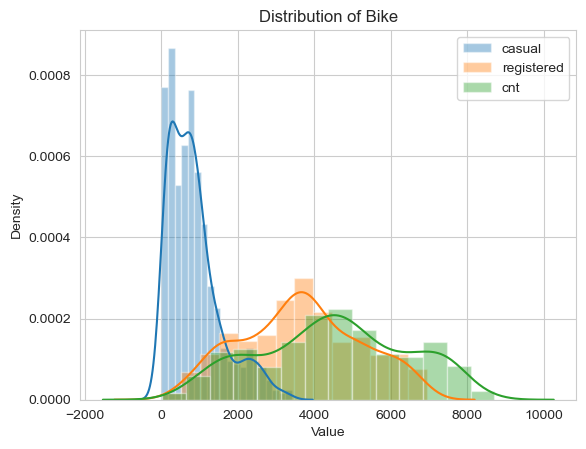

In [13]:
sns.distplot(bike_df['casual'], label = 'casual')
sns.distplot(bike_df['registered'], label = 'registered')
sns.distplot(bike_df['cnt'], label = 'cnt')
plt.legend(loc='upper right')
plt.xlabel("Value")
plt.title("Distribution of Bike")

在使用 Seaborn 的 sns.distplot 绘制分布图时，默认情况下它会显示数据的概率密度函数（PDF），即密度估计。密度估计是一种将数据平滑为连续曲线的方法，用来表示在给定范围内数据的相对可能性。换句话说，密度图显示的是在不同数值区间内数据出现的概率密度，而不是频率。

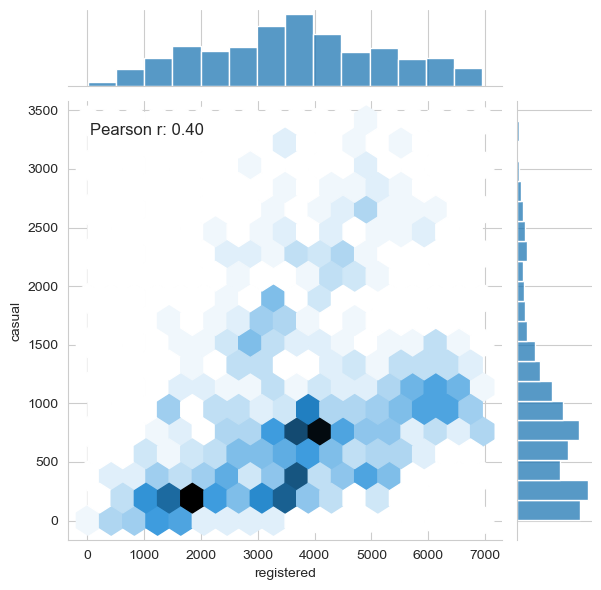

In [15]:
sns.jointplot(x='registered', y='casual', data=bike_df, kind='hex')

corr, _ = pearsonr(bike_df['registered'],bike_df['casual'])

# 在图上显示相关性系数
plt.annotate(f'Pearson r: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.show()

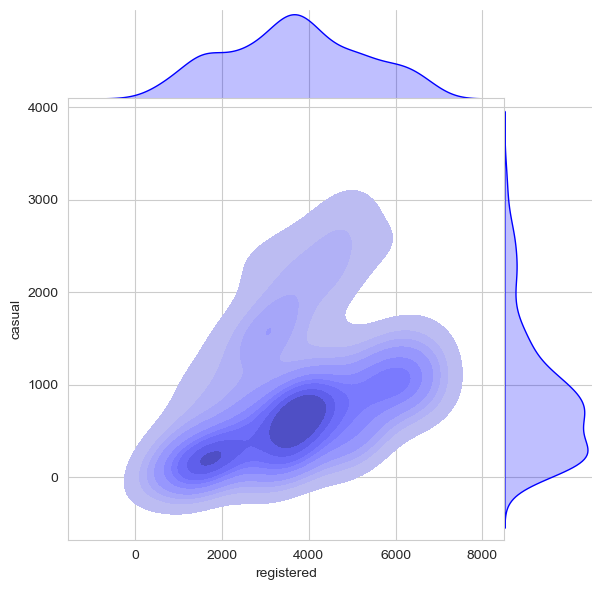

In [19]:
sns.jointplot(data=bike_df, x='registered', y='casual', kind = 'kde', 
              space=0, color='blue', fill=True)

## Inter-group analysis# 

<Axes: xlabel='weekday', ylabel='registered'>

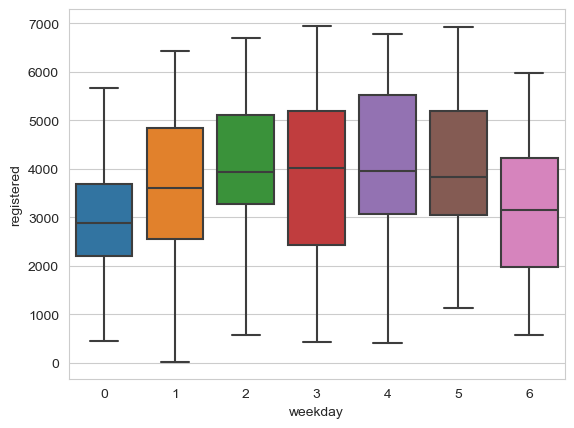

In [22]:
# boxplot
sns.boxplot(data=bike_df, x='weekday', y='registered')

<Axes: xlabel='weekday', ylabel='casual'>

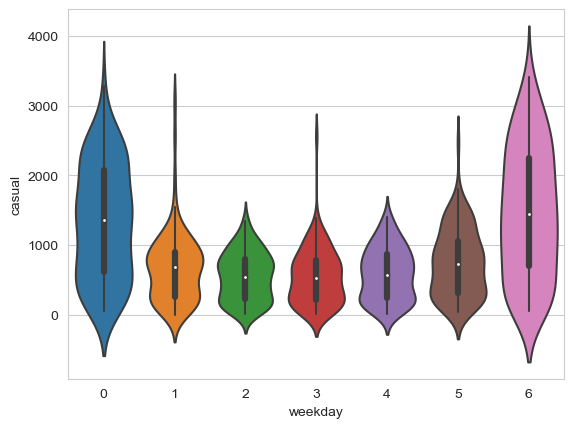

In [23]:
# Voilinbox
sns.violinplot(data=bike_df, x='weekday', y='casual', scale='count')